# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Name_: Soldevilla, Thoreenz\
_Student Number_: 2021-04225\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: October 26, 2023, 1:10 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldevilla

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - 28/30
* Problem 2 - 28/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Part A: Trapezoidal Rule**\
The trapezoidal rule is defined as:

$$I(a,b) \simeq h[\frac{1}{2}f(a)+\frac{1}{2}f(b)+\sum_{k=1}^{N-1}f(a+kh)]$$

Where:
$h$ is the width of the slice,
$a$ is the lower bound of the integral,
$b$ is the upper bound of the integral, and
$k$ is the iteration of slices.

First, we define the function int_trap() that takes the values of the integrand $f$, the lower bound $a$, the upper bound $b$, and the number of points $N$. 

In [2]:
def int_trap(f, a, b, N, **kwargs): 
    eval_x = np.linspace(a, b, N) 
    # The linspace() function provides us a set of points that are evenly spaced within an interval.
    # We see that it provides evenly spaced N numbers from a to b.
    y = f(eval_x, **kwargs)
    # We evaluate each function using the points defined. The **kwargs is necessary as it allows us to input
    # Multiple values on a single line such as lists or numpy arrays.
    h = eval_x[1] - eval_x[0]
    # We measure the width (h) from two consecutive points.
    area = h*(np.sum(y)-0.5*y[0]-0.5*y[-1])
    # We then multiply the width with the evaluated lower bound y[0], upper bound y[-1], and the sum of the points.
    return area

In [3]:
# We define the integrand.
def f_1(x):
    return 2*x**4+3*x**2+4*x+5
# We then evaluate int_trap with N = [10, 100, 1000] slices.
ans_trap_10 = int_trap(f_1, 0, 5, 10)
ans_trap_100 = int_trap(f_1, 0, 5, 100)
ans_trap_1000 = int_trap(f_1, 0, 5, 1000)

Let us see how accurate the trapezoidal rule is when we solve for the error. Note that the solution to the integral equation is
$$\int_{0}^{5}(2x^4 + 3x^2 + 4x + 5)dx = 1450$$

In [4]:
# We define the percent error as pct_error that takes comp_ans as the computed value and theo_ans as the theoretical value.
def pct_error(comp_ans, theo_ans):
    return abs((comp_ans-theo_ans)/theo_ans)

In [5]:
# We then compare the evaluated integral with their respective percent errors.
print('Answer is:',ans_trap_10,'with an error of:',pct_error(ans_trap_10, 1450))
print('Answer is:',ans_trap_100,'with an error of:',pct_error(ans_trap_100, 1450))
print('Answer is:',ans_trap_1000,'with an error of:',pct_error(ans_trap_1000, 1450))

Answer is: 1476.4600162576846 with an error of: 0.018248287074265263
Answer is: 1450.2189380754005 with an error of: 0.0001509917761382769
Answer is: 1450.002150131237 with an error of: 1.4828491289179134e-06


Note that as we increase $N$, the calculated value gets closer to the theoretical value. We could say that we are defining the int_trap() correctly because as we scale the slices by a factor of 10, the error scales by a factor of $10^2$. This is because the trapezoidal rule is a first-order integration rule that is accurate to $\mathcal{O}(h)$ and has an error of $\mathcal{O}(h^2)$.

**Part B: Simpson's Rule**\
We then define Simpson's rule. It is described as:
$$I(a,b)\simeq\frac{1}{3}h[f(a)+f(b)+4\sum_{k=1 (odd)}^{N-1}+2\sum_{k=2 (even)}^{N-2}f(a+kh)]$$
Where we multiply the width $h$ with the initial value of $s$ at the upper and lower bounds and the summation of loop over odd and even values of $k$, the iteration of quartic slices.
We can implement the summations as iterative loops.

Let us define int_simp() that takes the integrand $f$, the lower bound $a$, upper bound $b$, and the number of slices $N$.

In [6]:
def int_simp(f, a, b, N):
    # We measure h by dividing the width from b to a and divide by N.
    h = (b-a)/N
    # We obtain the initial values of the function from the bounds.
    s = f(a) + f(b)
    # We then obtain the odd values of k. We define the range from 1 to N and the step as 2. Each iteration adds to the 
    # initial value s.
    for k in range(1,N,2):
        s += 4*f(a+k*h)
    # Next, we obtain the even values of k, similar to the previous summation. 
    # We define the range from 2 to N and the step as 2.
    for k in range(2,N,2):
        s += 2*f(a+k*h)
    s = s*(1/3)*h
    return s

In [7]:
# We store the scaled N values then print them along with their deviation to the theoretical value.
ans_simp_10 = int_simp(f_1, 0, 5, 10)
ans_simp_100 = int_simp(f_1, 0, 5, 100)
ans_simp_1000 = int_simp(f_1, 0, 5, 1000)
print('Answer is:',ans_simp_10,'with an error of:',pct_error(ans_simp_10, 1450))
print('Answer is:',ans_simp_100,'with an error of:',pct_error(ans_simp_100, 1450))
print('Answer is:',ans_simp_1000,'with an error of:',pct_error(ans_simp_1000, 1450))

Answer is: 1450.0833333333333 with an error of: 5.7471264367763824e-05
Answer is: 1450.0000083333337 with an error of: 5.747126657485657e-09
Answer is: 1450.0000000008342 with an error of: 5.753338035870472e-13


We see here that as we scale $N$ by a factor of 10, the error scales by a factor of $10^4$. Note that the Simpson's rule is a third-order integration rule which is accurate by $\mathcal{O}(h^3)$ and has an error of $\mathcal{O}(h^4)$. We could then conclude that we are implementing int_simp() properly.

----------------
### Instructor Notes

In [14]:
# You might want to explicitly add an exact answer calculation on your code

def myfunc1(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

def myfunc1_int(x):
  return (2./5)*x**5 + x**3 + 2*x**2 + 5*x 

ans_exact = myfunc1_int(5)
print("The exact answer is %d" % ans_exact)

The exact answer is 1450


---

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

Gaussian Integration can be done using the Newton-Cotes formula, where:
$$I(a,b)\simeq\sum_{k=1}^{N}w_{k}f(x_{k})$$
Where we multiply sample points with a certain weight, which we define as:
$$w_{k}=\int_{a}^{b}\phi_{k}(x)dx$$
Here, $\phi$ represents the interpolating polynomial. The Gaussian quadrature uses the Legendre polynomial to determine the sample points and weights.

In [11]:
#Here is the function gaussxw() obtained from the Newman book
def gaussxw(f, N):
    # Initial approximation to roots of the legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))
    
    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N, float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0, p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
    
    #Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    return x, w

In [12]:
gaussxw(f_1, 3)

(array([ 7.74596669e-01, -8.96888137e-17, -7.74596669e-01]),
 array([0.55555556, 0.88888889, 0.55555556]))

We could see here that the gaussxw() function returns the points and weights in accordance with the function f_1(x). Now, we will fit these sample points over the interval of 0 to 5. These sample points must coincide with the zeroes of the Legendre polynomial.
To rescale the values, we must redefine the sample points $x'_{k}$ as:
$$x'_{k}=\frac{1}{2}(b-a)x_{k} + \frac{1}{2}(b+a)$$
Similarly, we rescale the weights $w'_{k}$ within the bounds, which we define as:
$$w'_{k} = \frac{1}{2}(b-a)w_{k}$$

Let us define int_gauss() that it takes the function $f$, number of points $N$, lower bound $a$, and upper bound $b$.

In [61]:
def int_gauss(f, N, a, b):
    # We define here the array of sample points and weights.
    x,w = gaussxw(f, N)
    # We then rescale the sample points and weights.
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    s = 0.0
    # We iteratively add each of the weighted sample points.
    for k in range(N):
        s += wp[k]*f(xp[k])
    return s

When we derive the integral using the Gaussian quadrature, we see that:

In [62]:
int_gauss(f_1, 3, 0, 5)

1450.000000000002

Which is very accurate to the theoretical answer by simply using three sample points.

---
### Instructor Notes

1. The best way to discuss accuracy is through **actual calculation of the percent error.**

---

### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

I have to define again the integral function that is suited for calculating the period $T$. We see here that period is dependent on amplitude $a$. I have to make sure that the function would separately work on any potential function.

In [63]:
# We define T as it takes values from the potential V, the upper bound a, and the iterative values of x.
def T(V, a, x):
    return (8/(V(a)-V(x)))**0.5 

# We then define T_integ, which is now dependent on the potential function.
def T_integ(V, N, a, amp):
    x,w = gaussxw(f_1, N)
    xp = 0.5*(amp-a)*x + 0.5*(amp+a)
    wp = 0.5*(amp-a)*w
    s = 0.0
    # Here in the Newton-Cotes part of the function, we then use its dependence on the potential function by creating
    # a sample point that can be rescaled in accordance with V, a and sample points x.
    for k in range(N):
        s += wp[k]*T(V, amp, xp[k])
    return s

In [64]:
# We then define the potential as x^4.
def V(x):
    return x**4

<function matplotlib.pyplot.show(*args, **kw)>

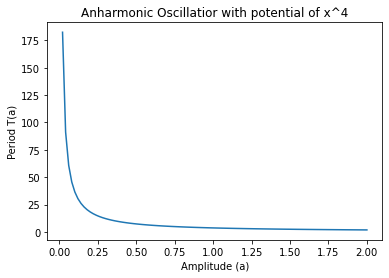

In [65]:
# We then plot the period as dependent on amplitude. 
# x_data would define 100 evenly spaced sample points ranging from 0 to 2.
# y_data would be T(a) from the a sample points.
x_data = []
y_data = []

x_start=0

# We form the amplitude and period data by iteratively appending them to the x_data and y_data list.
for i in range(100):
    x_start += 0.02
    x_data.append(x_start)
    y_data.append(T_integ(V, 20, 0, x_start))

# We then convert the data, which are inside lists, into a NumPy array.
x_data_np = np.array(x_data)
y_data_np = np.array(y_data)

# We then plot the amplitude data points versus the period data points.
plt.plot(x_data_np, y_data_np)
plt.title("Anharmonic Oscillatior with potential of x^4")
plt.xlabel("Amplitude (a)")
plt.ylabel("Period T(a)")
plt.show

We see here that as the amplitude increases, the period sharply decreases. This is because that the particle's oscillation is dependent on its rest position, $x=a$. As we increase the rest position, we increase the total energy, and thus we see that the particle will rock back and forth faster. Since the energy in such a potential well must be conserved, the angular momentum must be conserved as well. This means that as we proportionally increase the amplitude, the period should proportionally decrease.

----------------
### Instructor Notes

We find that the period $T$ decreases with increasing amplitude $a$ and diverges as the amplitude goes to zero. To better understand this, let us plot the potential $V(x) = x^4$:


Text(0.5, 0, 'x')

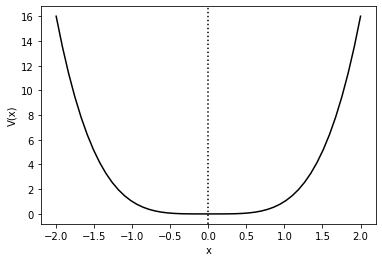

In [13]:
import matplotlib.pyplot as plt
xx = np.linspace(-2,2)
yy = xx**4

plt.plot(xx, yy, 'k-')
plt.axvline(0., color='k', ls=':')
plt.ylabel("V(x)")
plt.xlabel("x")

We see that the potential is very close to flat near $x=0$ up to $x \sim 0.5$. Starting at amplitudes smaller than 0.5 results in very slow motion and consequently a large period. We see this reflected in the period plot above, with the curve rising sharply towards $a=0$ starting around $a \sim 0.5$.

---

## General Comments
1. Find better ways to represent numerical results rather than printing it as it is. Take note of Significant Figures and Scientific Notation to effectively convey numbers in an organized manner. Take note that what you calculated is the relative error, percent (%) error must be multiplied with 100 and has a "%". 
2. Feel free to go above and beyond, add extra plots, especially if it helps explain the Physics of the problem.
3. The comments contained on the code hashtags should ideally be short phrases. If it's an entire sentence, place it on a separate markdown cell.
4. Good work and I commend your thorough discussion!